In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor #LinearRegression(공식).SGDregressor(학습_경사하강법)
from sklearn.neural_network import MLPRegressor #학습을 통해 만들어짐(딥러닝)
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

from sklearn.metrics import r2_score# 선형 모델(Linear Models)

from sklearn.datasets import load_boston, load_iris

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # 연속변수의 표준화
from sklearn.preprocessing import LabelEncoder # 범주형 변수 수치화

from sklearn.pipeline import make_pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor #vif

In [5]:
import seaborn as sb

In [2]:
#1번
data=pd.read_csv('../data/trees.csv')
data.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [3]:
x_data=data[["Girth","Height"]]
y_data=data[['Volume']]


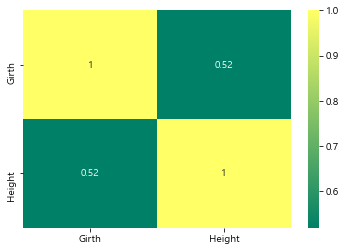

In [6]:
#상관관계 확인
sb.heatmap(x_data.corr(),annot=True,cmap="summer")
plt.show()


In [7]:
#다중공산성 확인
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(x_data.values, i )  for i in range( x_data.shape[1] ) ]
vif['features'] = x_data.columns
vif


,VIF Factor,features
0,25.633257,Girth
1,25.633257,Height


In [8]:
#cv
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                test_size=0.2,random_state=1)
model=make_pipeline(StandardScaler(),LinearRegression() )
model.fit(x_train, y_train)

tree_s=cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
print(tree_s)
print(tree_s.mean())

[0.84246197 0.97029464 0.9469665  0.94471808 0.28326461]
0.7975411602192339


In [9]:
p=model.predict([[8.8,63],[10.5,72]])
p


array([[ 5.84983575],
       [16.27579072]])

In [ ]:
# np.select([ ans['Volume']>=40,ans['Volume']>=30,ans['Volume']>=0 ], ['크다','보통','적음'])

In [10]:
	#2번
ans=y_data
ans['정도'] = np.where(ans['Volume']>=40, '크다', np.where(ans['Volume']>=30, '보통', '적음'))
ans

<ipython-input-10-29823909ca17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ans['정도'] = np.where(ans['Volume']>=40, '크다', '적음')


,Volume,정도
0,10.3,적음
1,10.3,적음
2,10.2,적음
3,16.4,적음
4,18.8,적음
5,19.7,적음
6,15.6,적음
7,18.2,적음
8,22.6,적음
9,19.9,적음


In [ ]:
# data['Height'].max()

In [11]:
#3번
d=data.sort_values('Height')
print(d.head(1))
print(d.tail(1))

   Girth  Height  Volume
2    8.8      63    10.2
    Girth  Height  Volume
30   20.6      87    77.0


In [3]:
data.nlargest( 5, 'Girth')

,Girth,Height,Volume
30,20.6,87,77.0
28,18.0,80,51.5
29,18.0,80,51.0
27,17.9,80,58.3
26,17.5,82,55.7


In [12]:
	#4번
d=data.sort_values('Girth', ascending=False)
d.head(5)

,Girth,Height,Volume
30,20.6,87,77.0
29,18.0,80,51.0
28,18.0,80,51.5
27,17.9,80,58.3
26,17.5,82,55.7
